## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:

print("tensorflow", tf.__version__)
print("matplotlib", plt.matplotlib.__version__)
print("pandas", pd.__version__)
print("seaborn", sns.__version__)

tensorflow 2.18.0
matplotlib 3.10.0
pandas 2.2.2
seaborn 0.13.2


#### Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

### Extracting kaggle file

In [3]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the correct path to `kaggle.json` inside Google Drive
KAGGLE_JSON_PATH = "/content/drive/MyDrive/Kaggle/kaggle.json"  # Update the folder if needed

# Check if the file exists before copying
if os.path.exists(KAGGLE_JSON_PATH):
    os.makedirs('/root/.kaggle', exist_ok=True)  # Create Kaggle directory if not exists
    os.system(f'cp "{KAGGLE_JSON_PATH}" /root/.kaggle/kaggle.json')  # Copy file
    os.chmod('/root/.kaggle/kaggle.json', 600)  # Set permissions
    print("✅ Kaggle API key successfully copied!")
else:
    print("❌ kaggle.json file NOT FOUND! Please check the file path in Google Drive.")

# Test Kaggle API
!kaggle competitions list


Mounted at /content/drive
✅ Kaggle API key successfully copied!
ref                                                                               deadline             category                reward  teamCount  userHasEntered  
--------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/arc-prize-2025                                2025-11-03 23:59:00  Featured           725,000 Usd        164           False  
https://www.kaggle.com/competitions/stanford-rna-3d-folding                       2025-05-29 23:59:00  Featured            75,000 Usd        864           False  
https://www.kaggle.com/competitions/byu-locating-bacterial-flagellar-motors-2025  2025-06-04 23:59:00  Research            65,000 Usd        593           False  
https://www.kaggle.com/competitions/birdclef-2025                                 2025-06-05 23:59:00  Research          

In [4]:
import sys
print("Python", sys.version)
import google.colab
print("google.colab", google.colab.__version__)


Python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
google.colab 0.0.1a2


## Importing Dataset

In [5]:
# Create the Kaggle directory and move kaggle.json there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Set correct permissions
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

# Unzip the dataset
!unzip new-plant-diseases-dataset.zip -d /content/new_plant_diseases


Streaming output truncated to the last 5000 lines.
  inflating: /content/new_plant_diseases/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: /content/new_plant_diseases/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: /content/new_plant_diseases/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: /content/new_plant_diseases/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: /content/new_plant_diseases/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid

## Data Preprocessing

### Training Image Preprocessing

In [6]:
train_dataset_path = "/content/new_plant_diseases/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
training_set = tf.keras.utils.image_dataset_from_directory(
    train_dataset_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [7]:
valid_dataset_path = "/content/new_plant_diseases/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_dataset_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [8]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [9]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[148.25 134.25 134.25]
   [145.75 131.75 131.75]
   [127.25 113.25 113.25]
   ...
   [142.75 124.75 124.75]
   [139.75 121.75 121.75]
   [139.5  121.5  121.5 ]]

  [[149.5  135.5  135.5 ]
   [128.5  114.5  114.5 ]
   [163.   149.   149.  ]
   ...
   [132.75 114.75 114.75]
   [143.5  125.5  125.5 ]
   [153.5  135.5  135.5 ]]

  [[148.5  134.5  134.5 ]
   [157.5  143.5  143.5 ]
   [156.25 142.25 142.25]
   ...
   [144.   126.   126.  ]
   [151.5  133.5  133.5 ]
   [148.5  130.5  130.5 ]]

  ...

  [[195.5  189.5  199.5 ]
   [190.   184.   194.  ]
   [181.5  175.5  185.5 ]
   ...
   [149.5  142.5  149.5 ]
   [166.25 159.25 166.25]
   [165.5  158.5  165.5 ]]

  [[196.5  190.5  200.5 ]
   [183.   177.   187.  ]
   [182.75 176.75 186.75]
   ...
   [155.25 148.25 155.25]
   [149.5  142.5  149.5 ]
   [150.75 143.75 150.75]]

  [[187.25 181.25 191.25]
   [189.25 183.25 193.25]
   [180.   174.   184.  ]
   ...
   [147.25 140.25 147.25]
   [162.5  155.5  162.5 ]
   [154.   147.   15

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [10]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [25]:
import tensorflow as tf

print("tensorflow", tf.__version__)


tensorflow 2.18.0


In [11]:
model = Sequential()

## Building Convolution Layer

In [12]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(units=1500,activation='relu'))

In [20]:
model.add(Dropout(0.4))

In [21]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [24]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 173s 72ms/step - accuracy: 0.4066 - loss: 2.1071 - val_accuracy: 0.8408 - val_loss: 0.5035
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 149s 68ms/step - accuracy: 0.8427 - loss: 0.4960 - val_accuracy: 0.9149 - val_loss: 0.2640
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 202s 68ms/step - accuracy: 0.9085 - loss: 0.2803 - val_accuracy: 0.9402 - val_loss: 0.1813
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 149s 68ms/step - accuracy: 0.9353 - loss: 0.1988 - val_accuracy: 0.9504 - val_loss: 0.1575
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 202s 68ms/step - accuracy: 0.9527 - loss: 0.1446 - val_accuracy: 0.9597 - val_loss: 0.1299
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 195s 65ms/step - accuracy: 0.9639 - loss: 0.1134 - val_accuracy: 0.9481 - val_loss: 0.1816
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 209s 68ms/step - accuracy: 0.9700 - loss: 0.0936 - val_accuracy: 0.9553 - val_loss: 0.1422
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 

## Model Evaluation

In [26]:

#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 0.9937 - loss: 0.0211


In [27]:
print(train_loss,train_acc)

0.01893165335059166 0.9941674470901489


In [28]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9712 - loss: 0.0970


In [29]:
print(val_loss,val_acc)

0.09443086385726929 0.9721147418022156


### Saving Model

In [30]:
model.save("trained_model.keras")

In [31]:
training_history.history

{'accuracy': [0.606956422328949,
  0.8629916906356812,
  0.9158119559288025,
  0.9406927824020386,
  0.9560565948486328,
  0.9655594229698181,
  0.9719752669334412,
  0.9758731126785278,
  0.9789316654205322,
  0.981492280960083],
 'loss': [1.332924246788025,
  0.43255889415740967,
  0.2602559030056,
  0.18381357192993164,
  0.13471126556396484,
  0.10774128139019012,
  0.0867653414607048,
  0.07333793491125107,
  0.06344029307365417,
  0.05737214908003807],
 'val_accuracy': [0.8407694101333618,
  0.9149214625358582,
  0.9402458667755127,
  0.9503756165504456,
  0.9597086310386658,
  0.9480992555618286,
  0.9553266763687134,
  0.9544730186462402,
  0.9707489013671875,
  0.9721147418022156],
 'val_loss': [0.5034769773483276,
  0.26403820514678955,
  0.1813337206840515,
  0.1574864536523819,
  0.12988540530204773,
  0.18159553408622742,
  0.14218071103096008,
  0.14815892279148102,
  0.10050071775913239,
  0.09443090856075287]}

In [32]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [33]:
training_history.history['val_accuracy']

[0.8407694101333618,
 0.9149214625358582,
 0.9402458667755127,
 0.9503756165504456,
 0.9597086310386658,
 0.9480992555618286,
 0.9553266763687134,
 0.9544730186462402,
 0.9707489013671875,
 0.9721147418022156]

### Accuracy Visualization

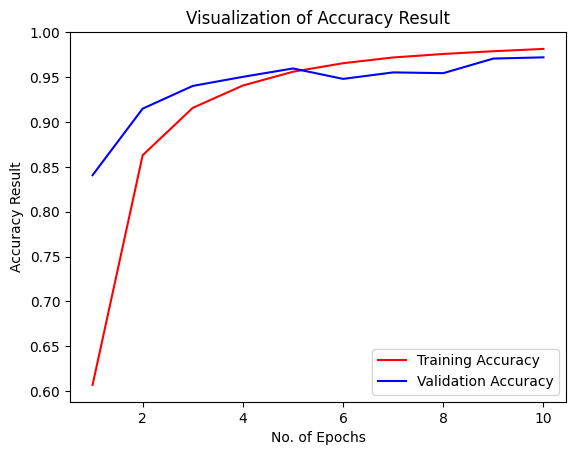

In [34]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [35]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [36]:
#using valid dataset as a test dataset because test dataset is not arranged in sequesntial order to test the model

In [37]:
test_dataset_path = "/content/new_plant_diseases/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_set = tf.keras.utils.image_dataset_from_directory(
    test_dataset_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [38]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step


(array([[1.0000000e+00, 5.3623689e-10, 5.3663541e-12, ..., 7.1444662e-17,
         1.6868531e-16, 5.0771214e-15],
        [9.9999988e-01, 5.3370382e-08, 1.0840285e-12, ..., 4.2588196e-18,
         2.5983763e-16, 9.5668496e-16],
        [1.0000000e+00, 6.0923861e-14, 2.0557684e-15, ..., 8.9691099e-23,
         1.6010658e-21, 3.7264317e-18],
        ...,
        [2.3142844e-08, 2.0831943e-12, 7.3498958e-09, ..., 5.6669908e-11,
         2.5003923e-11, 9.9998939e-01],
        [8.5666682e-11, 2.9939449e-15, 8.9251653e-12, ..., 7.1356289e-13,
         1.2453388e-12, 1.0000000e+00],
        [1.1188895e-11, 6.6106526e-12, 1.3665858e-09, ..., 5.8696303e-12,
         5.3391985e-10, 9.9980682e-01]], dtype=float32),
 (17572, 38))

In [39]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [40]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [41]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [42]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

![image.png](attachment:f464cbcc-5d6b-4f32-835c-9aabe0f9c5d4.png)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.98      0.97       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.97      0.96      0.96       502
                               Blueberry___healthy       0.98      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.94      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.97      0.

In [45]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[492,   3,   0, ...,   0,   0,   0],
       [  0, 490,   0, ...,   0,   0,   0],
       [  0,   0, 427, ...,   1,   0,   0],
       ...,
       [  0,   0,   0, ..., 487,   0,   0],
       [  1,   0,   0, ...,   0, 446,   0],
       [  0,   0,   1, ...,   0,   0, 461]])

### Confusion Matrix Visualization

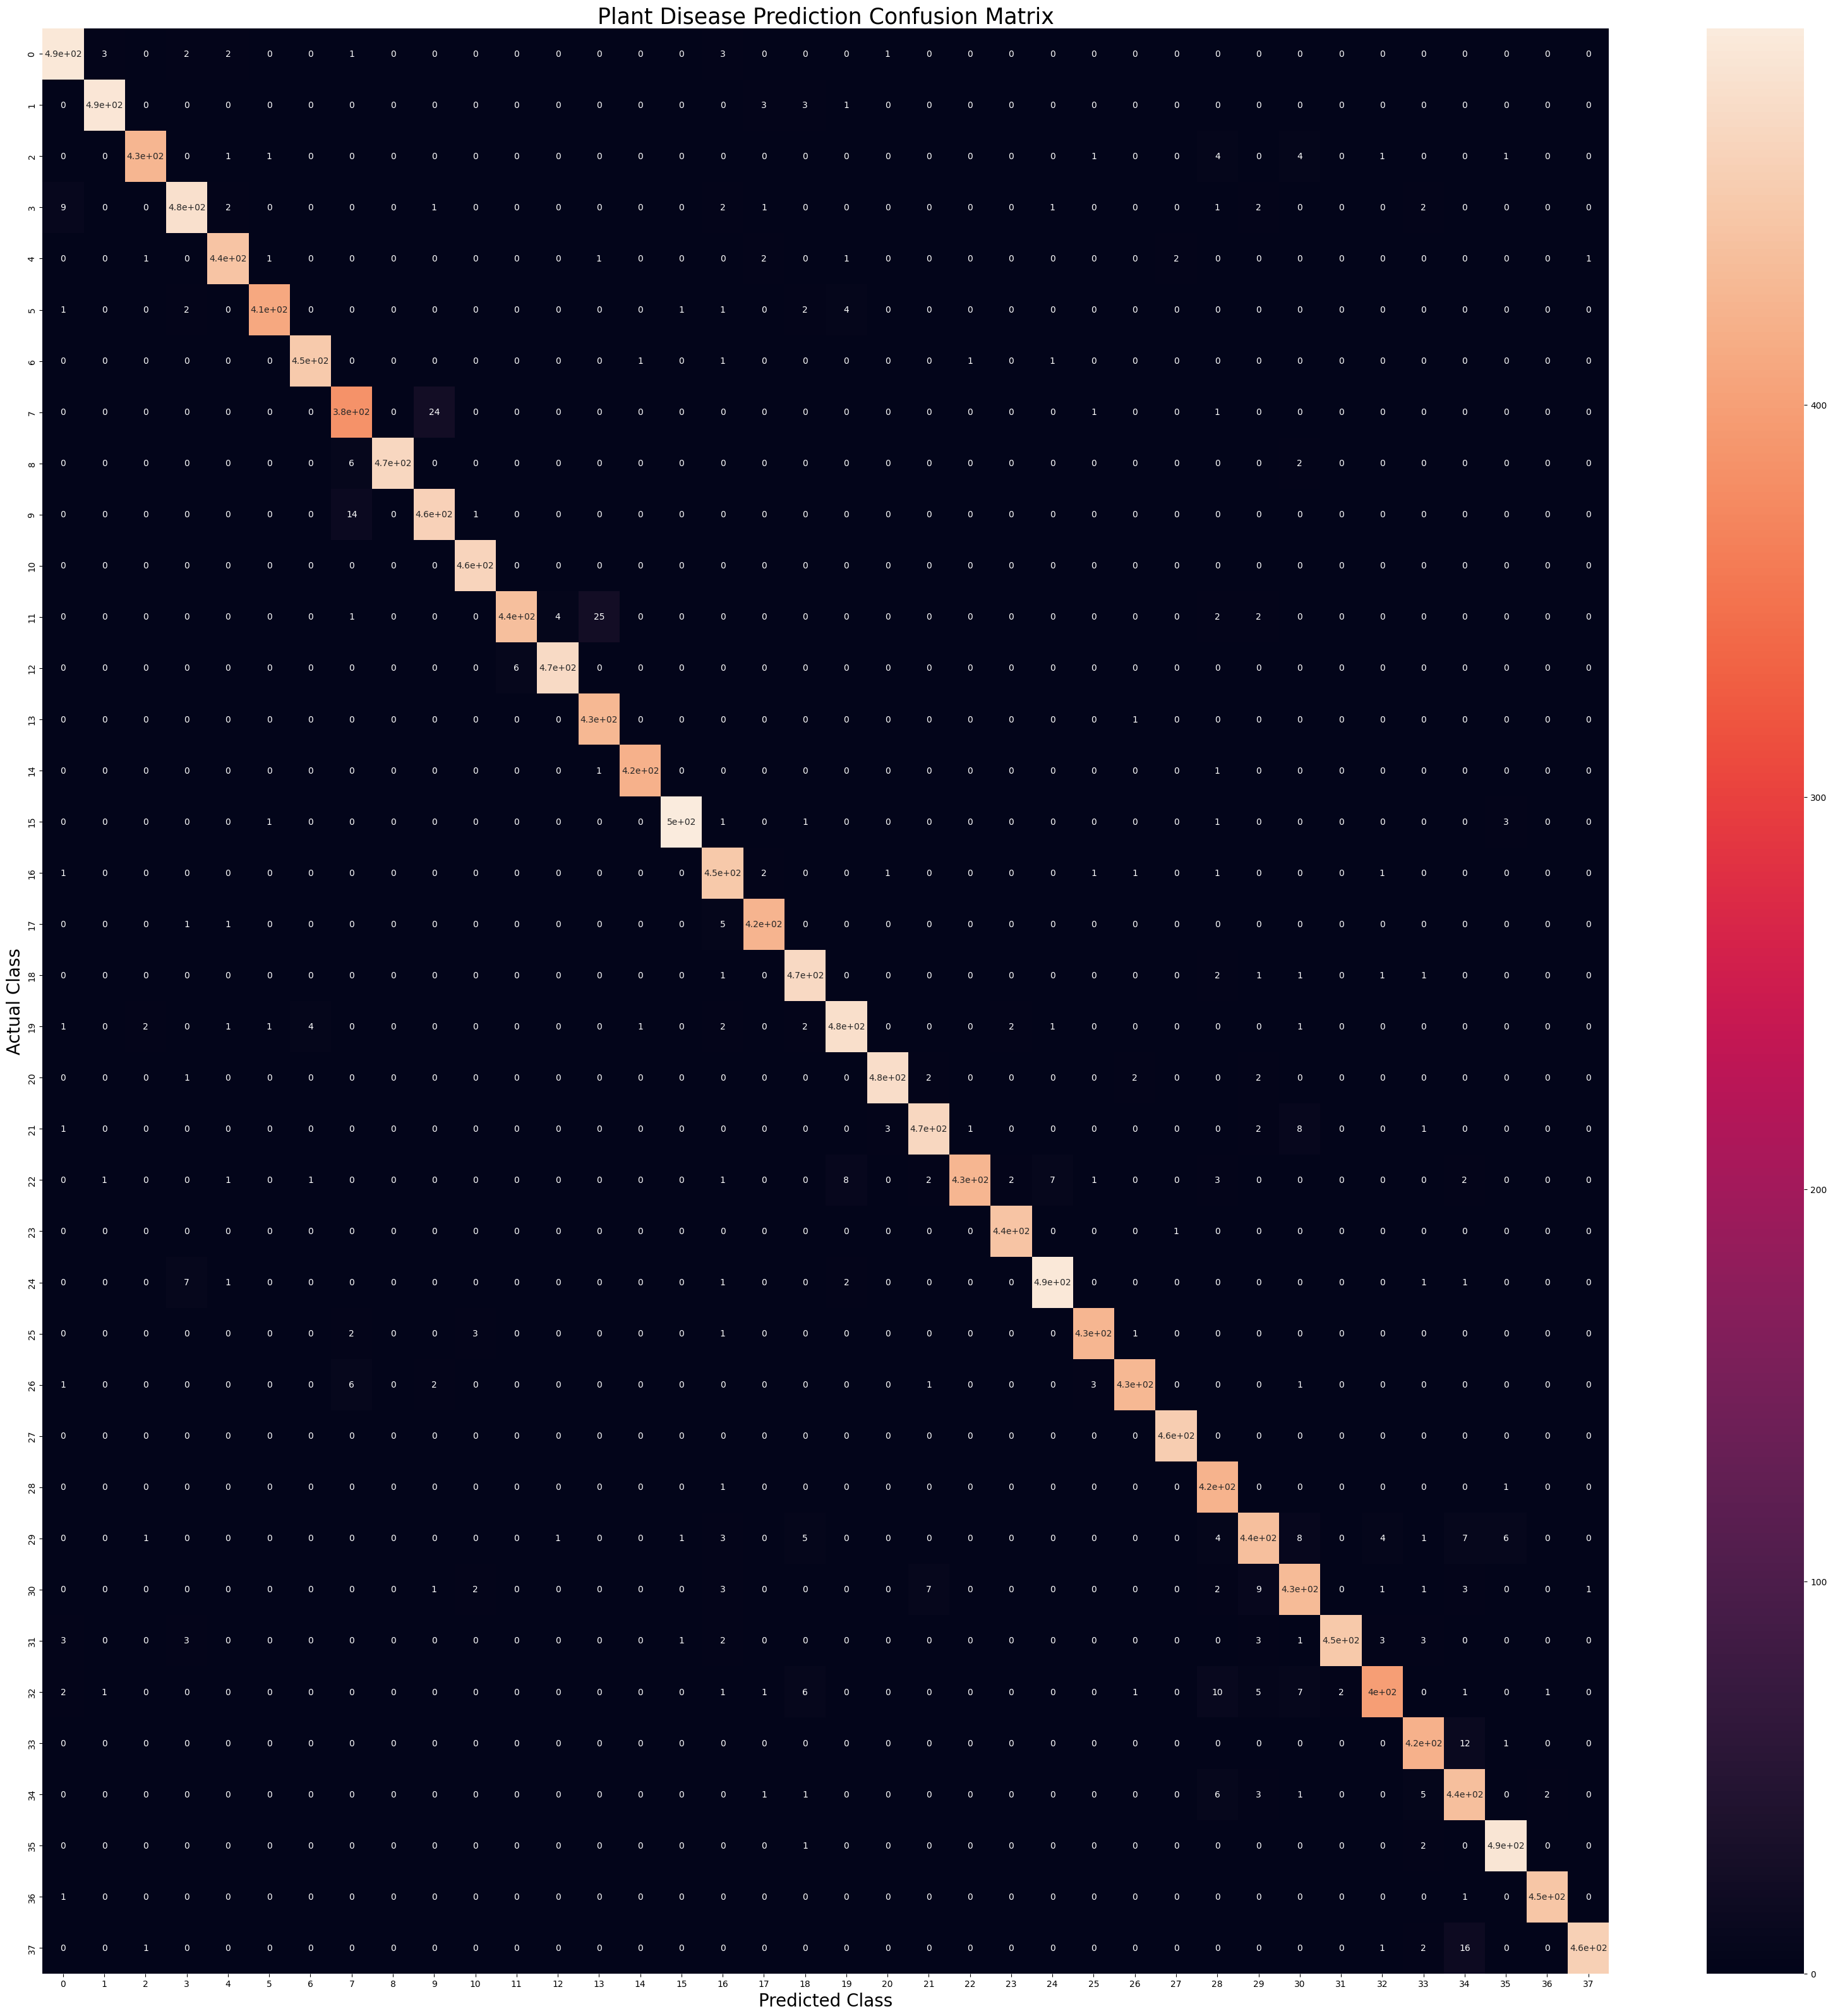

In [46]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()

# Plant Disease Treatment

### Importing required libraries

In [47]:
import os
import json
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [48]:
print("Python", sys.version)  # Python version
print("os", "Version not available")  # os does not have a version attribute
print("json", "Built-in module, version not applicable")  # json is a built-in module
print("numpy", np.__version__)
print("tensorflow", tf.__version__)
print("keras", keras.__version__)  # Keras version (included in TensorFlow)

Python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
os Version not available
json Built-in module, version not applicable
numpy 2.0.2
tensorflow 2.18.0
keras 3.8.0


## Importing Dataset for Treatment of plant disease

In [49]:
dataset_path = "/content/new_plant_diseases/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"  # Update with actual dataset path
image_size = (128, 128)  # Resize images
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_dataset_path = "/content/new_plant_diseases/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
train_generator = datagen.flow_from_directory(
    train_dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

valid_dataset_path = "/content/new_plant_diseases/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
val_generator = datagen.flow_from_directory(
    valid_dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

num_classes = len(train_generator.class_indices)  # 38 Classes


Found 56251 images belonging to 38 classes.
Found 3503 images belonging to 38 classes.


## Building Convolution Layer

In [50]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,309,542 (12.62 MB)

 Trainable params: 3,309,542 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Print all class labels
print("Class Labels:", train_generator.class_indices)


Class Labels: {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight

In [52]:
epochs = 10  # Adjust as needed

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

# Save the trained model
model.save("plant_disease_cnn.h5")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1758/1758 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.2708 - loss: 2.6242 - val_accuracy: 0.7688 - val_loss: 0.8083
Epoch 2/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 77s 44ms/step - accuracy: 0.6389 - loss: 1.1606 - val_accuracy: 0.8470 - val_loss: 0.5183
Epoch 3/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 73s 42ms/step - accuracy: 0.7308 - loss: 0.8452 - val_accuracy: 0.8695 - val_loss: 0.4368
Epoch 4/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 76s 43ms/step - accuracy: 0.7812 - loss: 0.6831 - val_accuracy: 0.8989 - val_loss: 0.3303
Epoch 5/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 73s 42ms/step - accuracy: 0.8134 - loss: 0.5709 - val_accuracy: 0.8713 - val_loss: 0.4019
Epoch 6/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 75s 43ms/step - accuracy: 0.8426 - loss: 0.4815 - val_accuracy: 0.9215 - val_loss: 0.2472
Epoch 7/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.8618 - loss: 0.4172 - val_accuracy: 0.9201 - val_loss: 0.2456
Epoch 8/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 90s 51ms/step - accuracy: 0.8787 - loss: 0.36

## Importing treatment json file from drive

In [53]:
import json
import os
from google.colab import drive

# Mount Google Drive (only needed once per session)
drive.mount('/content/drive')

# Define the correct path to the JSON file in Google Drive
JSON_PATH = "/content/drive/MyDrive/Colab_Data/plant_disease_treatment.json"  # Update with correct folder

# Check if the file exists before loading
if os.path.exists(JSON_PATH):
    with open(JSON_PATH, "r") as f:
        treatment_data = json.load(f)
    print("✅ Treatment JSON file loaded successfully!")
else:
    print("❌ Error: Treatment JSON file NOT FOUND! Please check the path.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Treatment JSON file loaded successfully!


In [54]:
'''import json
import re

# Load the treatment JSON file
json_path = "/content/plant_disease_treatment.json"  # Update with correct file path
with open(json_path, "r") as f:
    treatment_data = json.load(f)'''

'import json\nimport re\n\n# Load the treatment JSON file\njson_path = "/content/plant_disease_treatment.json"  # Update with correct file path\nwith open(json_path, "r") as f:\n    treatment_data = json.load(f)'

In [55]:

def normalize_class_name(class_name):
    """Convert class names to match JSON format (remove underscores, fix capitalization)."""
    class_name = class_name.replace("___", " ")  # Replace multiple underscores
    class_name = class_name.replace("_", " ")  # Replace single underscores
    class_name = re.sub(r"\s+", " ", class_name).strip()  # Remove extra spaces
    return class_name.title()  # Capitalize first letters

def predict_plant_disease(img_path):
    img = image.load_img(img_path, target_size=image_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)

    # Correct class name mapping
    class_labels = list(train_generator.class_indices.keys())
    predicted_class = class_labels[predicted_class_index]

    # Normalize class name for JSON lookup
    predicted_class_normalized = normalize_class_name(predicted_class)

    # Check if the normalized name is in JSON
    if predicted_class_normalized in treatment_data:
        treatment_info = treatment_data[predicted_class_normalized]
    else:
        # Attempt to fix extra words (like "Tomato Tomato")
        words = predicted_class_normalized.split()
        for i in range(len(words)):
            possible_name = " ".join(words[i:])
            if possible_name in treatment_data:
                treatment_info = treatment_data[possible_name]
                predicted_class_normalized = possible_name  # Update class name
                break
        else:
            treatment_info = "No treatment information available."

    # Debugging
    print(f"Predicted Class (Raw): {predicted_class}")
    print(f"Predicted Class (Normalized): {predicted_class_normalized}")
    print(f"Matching JSON Keys: {list(treatment_data.keys())}")

    return predicted_class_normalized, treatment_info



## Giving treatment :- Precaution & Cure

In [56]:
from tensorflow.keras.preprocessing import image
import numpy as np
import re

# Test with an image
image_path = "/content/new_plant_diseases/test/test/PotatoEarlyBlight2.JPG"
predicted_class, treatment_info = predict_plant_disease(image_path)

print(f"Predicted Disease: {predicted_class}")
print(f"Treatment: {treatment_info}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step
Predicted Class (Raw): Potato___Early_blight
Predicted Class (Normalized): Potato Early Blight
Matching JSON Keys: ['Apple Scab', 'Apple Black Rot', 'Apple Cedar Rust', 'Apple Healthy', 'Blueberry Healthy', 'Cherry Powdery Mildew', 'Cherry Healthy', 'Corn Cercospora Leaf Spot & Gray Leaf Spot', 'Corn Common Rust', 'Corn Northern Leaf Blight', 'Corn Healthy', 'Grape Black Rot', 'Grape Esca (Black Measles)', 'Grape Leaf Blight (Isariopsis Leaf Spot)', 'Grape Healthy', 'Orange Haunglongbing (Citrus Greening)', 'Peach Bacterial Spot', 'Peach Healthy', 'Pepper Bell Bacterial Spot', 'Pepper Bell Healthy', 'Potato Early Blight', 'Potato Late Blight', 'Potato Healthy', 'Raspberry Healthy', 'Soybean Healthy', 'Squash Powdery Mildew', 'Strawberry Leaf Scorch', 'Strawberry Healthy', 'Tomato Bacterial Spot', 'Tomato Early Blight', 'Tomato Late Blight', 'Tomato Leaf Mold', 'Tomato Septoria Leaf Spot', 'Tomato Spider Mites (Two-Spotted Spider Mite)', 'Tomato Ta

# Testing the image

## Importing Libraries

In [57]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Loading Model

In [58]:
model  = tf.keras.models.load_model('trained_model.keras')


In [59]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,528,288 (89.75 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,685,526 (59.84 MB)

### Visualizaing Single Image of Test set

In [60]:
!pip install opencv-python

In [61]:
import cv2
print("cv2", cv2.__version__)


cv2 4.11.0


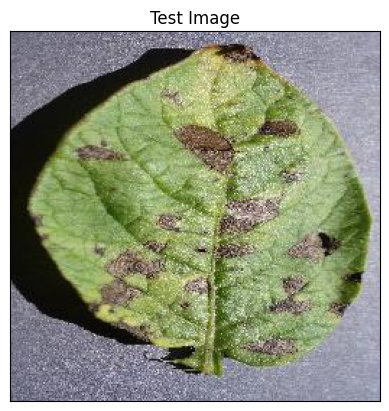

In [62]:
import cv2
image_path = "/content/new_plant_diseases/test/test/PotatoEarlyBlight2.JPG"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert BGR image to RGB

#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [63]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [64]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


(array([[1.94301606e-12, 1.80905129e-14, 5.69568264e-14, 1.10047754e-13,
         2.19961817e-16, 6.93583374e-14, 3.19347270e-17, 1.03208688e-13,
         4.40193739e-14, 4.42441189e-14, 2.52316014e-19, 7.73655823e-20,
         1.30641060e-17, 5.36416851e-14, 8.14833714e-20, 9.91816818e-16,
         8.02913644e-14, 6.90912542e-21, 1.82526842e-14, 1.74274488e-16,
         1.00000000e+00, 2.17232801e-10, 4.96894328e-14, 1.95711876e-17,
         3.75554742e-16, 5.13953631e-15, 1.54823394e-11, 5.38499909e-14,
         1.79101953e-18, 4.50546067e-13, 6.73196872e-12, 2.82384704e-17,
         6.50197647e-12, 7.11071648e-19, 1.74955813e-17, 6.15118064e-20,
         6.52266527e-21, 1.17563514e-14]], dtype=float32),
 (1, 38))

In [65]:
result_index = np.argmax(prediction)
result_index

np.int64(20)

In [66]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

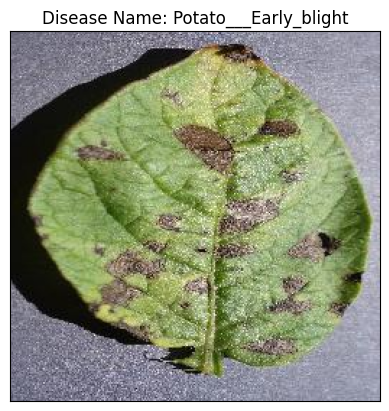

In [67]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

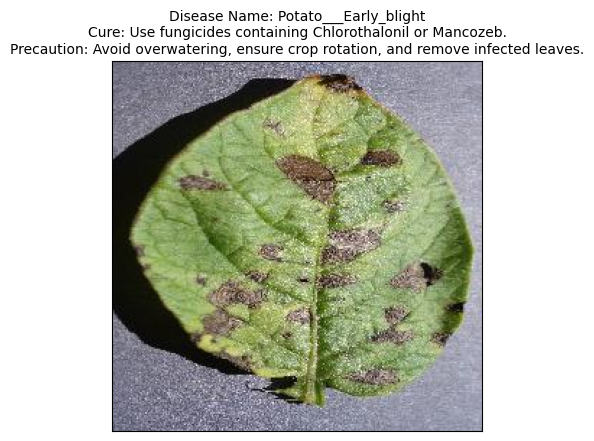

In [68]:
import matplotlib.pyplot as plt

# Displaying Result of disease prediction
model_prediction = class_name[result_index]

# Extract treatment information
treatment_cure = treatment_info.get('cure', 'No specific cure available')
treatment_precaution = treatment_info.get('precaution', 'No precaution details available')

# Format treatment details for display
treatment_text = f"Cure: {treatment_cure}\nPrecaution: {treatment_precaution}"

plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}\n{treatment_text}", fontsize=10)
plt.xticks([])
plt.yticks([])
plt.show()


In [69]:
model_prediction

'Potato___Early_blight'

In [70]:
# Extract treatment information
treatment_cure = treatment_info.get('cure', 'No specific cure available')
treatment_precaution = treatment_info.get('precaution', 'No precaution details available')

# Format treatment details for display
treatment_text = f"Cure: {treatment_cure}\nPrecaution: {treatment_precaution}"


In [71]:
treatment_cure

'Use fungicides containing Chlorothalonil or Mancozeb.'

In [72]:
treatment_precaution

'Avoid overwatering, ensure crop rotation, and remove infected leaves.'

In [73]:
# Assuming 'model' is your trained Keras model
model.save("model.h5")
print("CNN Model saved successfully! in h5")


CNN Model saved successfully! in h5


In [74]:
# Assuming 'model' is your trained Keras model
model.save("model.keras")
print("CNN Model saved successfully! in keras")


CNN Model saved successfully! in keras
